In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import LabelEncoder

# Carregar data set
df = pd.read_csv('/content/CREDIT_SCORE_PROJETO_PARTE1 (1).csv', delimiter=';')
df.head(10)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,"50.000,00",Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,"100.000,00",Master's Degree,Married,2,Owned,High
2,35.0,Female,"75.000,00",Doctorate,Married,1,Owned,High
3,40.0,Male,"125.000,00",High School Diploma,Single,0,Owned,High
4,45.0,Female,"100.000,00",Bachelor's Degree,Married,3,Owned,High
5,50.0,Male,"150.000,00",Master's Degree,Married,0,Owned,High
6,26.0,Female,"40.000,00",Associate's Degree,Single,0,Rented,Average
7,31.0,Male,"60.000,00",Bachelor's Degree,Single,0,Rented,Average
8,NaN,Female,"80.000,00",Master's Degree,Married,2,Owned,High
9,NaN,Male,"105.000,00",Doctorate,Single,0,Owned,High


In [ ]:
#Checagem de valores nulos.
valores_nulos = df.isnull().sum()
print(valores_nulos)

#Estou deletando menores de 18 anos e pessoas que não cadastraram a idade.
df = df[df['Age'] >= 18].dropna(subset=['Age'])
df = df[df['Age'] != 'nan'].dropna(subset=['Age'])

valores_nulos = df.isnull().sum()
print(valores_nulos)

Age                   34
Gender                 0
Income                 0
Education              0
Marital Status         0
Number of Children     0
Home Ownership         0
Credit Score           0
dtype: int64
Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64


In [ ]:
#Checagem de dados incorretos

print(df['Gender'].unique())
print(df['Education'].unique())
print(df['Marital Status'].unique())
print(df['Number of Children'].unique())
print(df['Home Ownership'].unique())
print(df['Credit Score'].unique())
print(df['Age'].unique())

# Ganho anual
df['Income'] = df['Income'].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False).astype(float)

['Female' 'Male']
["Bachelor's Degree" "Master's Degree" 'Doctorate' 'High School Diploma'
 "Associate's Degree"]
['Single' 'Married']
[0 2 1 3]
['Rented' 'Owned']
['High' 'Average' 'Low']
[25. 30. 35. 40. 45. 50. 26. 31. 43. 48. 53. 29. 34. 39. 44. 49. 36. 41.
 46. 51. 27. 32. 37. 42. 47. 52. 28. 33. 38.]


In [ ]:
# Traduzindo Moradia
df['Home Ownership'] = df['Home Ownership'].replace({
    0: 'Alugada',
    1: 'Própria',
    })

# Traduzindo Estado cívil
df['Marital Status'] = df['Marital Status'].replace({
    'Single': 'Solteiro',
    'Married': 'Casado',
    })

# Traduzindo Gênero
df['Gender'] = df['Gender'].replace({
    'Male': 'Masculino',
    'Female': 'Feminino',
    })
# Traduzindo niveis de credito
df['Credit Score'] = df['Credit Score'].replace({
    'High': 'Alto',
    'Average': 'Médio',
    'Low': 'baixo',
    })

# Traduzindo níveis de ensino
df['Education'].value_counts()
print(df['Education'].value_counts())

df['Education'] = df['Education'].replace({
    'Bachelor\'s Degree':'Bacharel',
    'Master\'s Degree':'Mestrado',
    'Doctorate':'Doutorado',
    'High School Diploma':'Diploma do Ensino Médio',
    'Associate\'s Degree':'Grau de Associado',
})

df['Education'].value_counts()
print('\n')
print(df['Education'].value_counts())




Education
Bachelor's Degree      34
Master's Degree        30
Doctorate              24
High School Diploma    22
Associate's Degree     20
Name: count, dtype: int64


Education
Bacharel                   34
Mestrado                   30
Doutorado                  24
Diploma do Ensino Médio    22
Grau de Associado          20
Name: count, dtype: int64


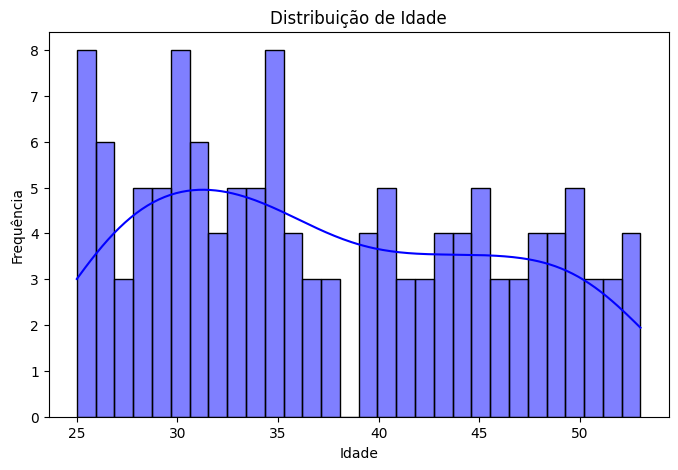

In [ ]:
#Análise Univariada - Idades dos clientes
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True, color="blue")
plt.title("Distribuição de Idade")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.show()

### Insights - Distribuição de Idade

O histograma da distribuição de idade mostra a frequência de diferentes faixas etárias entre os clientes. Isso nos dá uma ideia da distribuição geral das idades na base de dados e se há picos ou assimetrias. A versão interativa permite explorar melhor os dados.

In [ ]:
# Análise Univariada - Distribuição de Renda

fig = px.histogram(df, x='Income', nbins=30, title='Distribuição de Renda',
                   labels={'Income': 'Renda', 'count': 'Frequência'})
fig.update_layout(xaxis_title='Renda', yaxis_title='Frequência')
fig.show()

###Distribuição de Renda
O histograma da distribuição de renda mostra a frequência de diferentes faixas de renda entre os clientes. Isso nos dá uma ideia da distribuição geral da renda na base de dados e se há picos ou assimetrias.

/tmp/ipython-input-1405825521.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




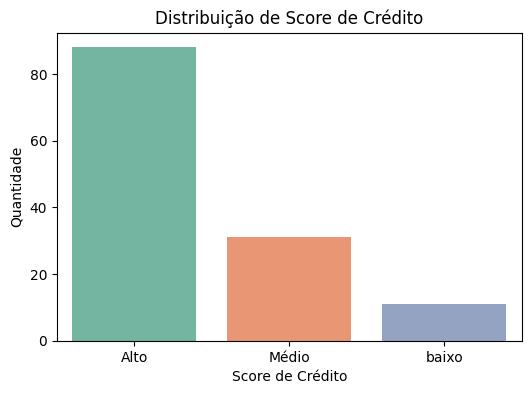

In [ ]:
# Análise Univariada - Distribuição de Score de Crédito
plt.figure(figsize=(6,4))
sns.countplot(x="Credit Score", data=df, palette="Set2")
plt.title("Distribuição de Score de Crédito")
plt.xlabel("Score de Crédito")
plt.ylabel("Quantidade")
plt.show()

### Insights - Distribuição do Score de Crédito

Este gráfico de barras mostra a contagem de clientes em cada categoria de Score de Crédito (Alto, Médio, Baixo). Podemos ver a distribuição geral do score na base de dados, o que é importante para entender o balanceamento das classes antes de construir um modelo preditivo. No caso atual, a classe 'Alto' é a mais frequente.

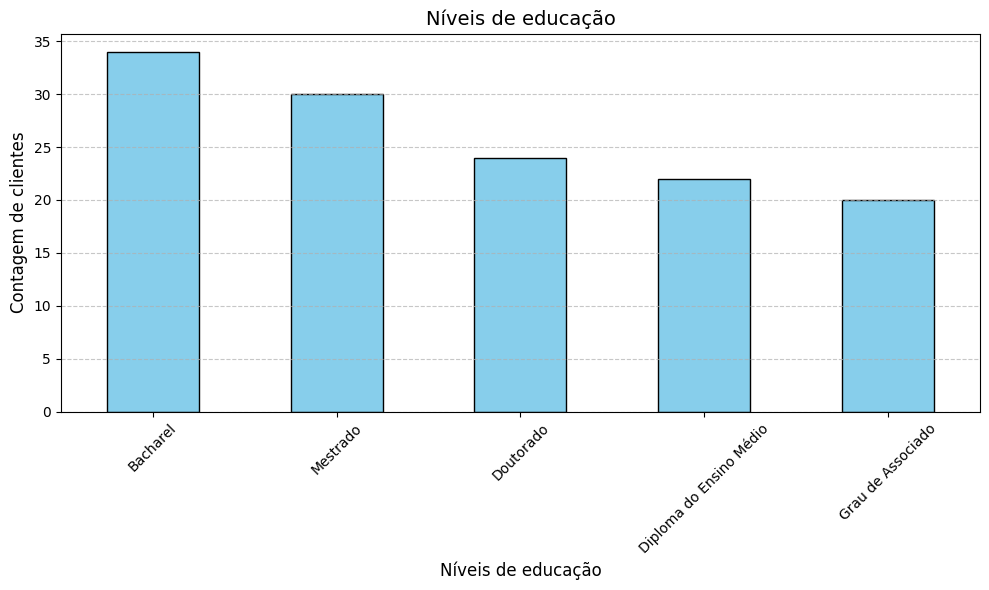

In [ ]:
#Análise Univariada - Educação Acadêmica

plt.figure(figsize=(10, 6))
df['Education'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Níveis de educação", fontsize=14)
plt.xlabel("Níveis de educação", fontsize=12)
plt.ylabel("Contagem de clientes", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Ordenar o DataFrame pela coluna 'Income' do menor para o maior
df_sorted_by_income = df.sort_values(by='Income', ascending=True)

# Análise Bivariada - Idade vs Renda com dados ordenados por Renda

fig = px.scatter(df_sorted_by_income, x="Age", y="Income", color="Credit Score",
                 title="Idade vs Renda por Score de Crédito",
                 labels={"Age": "Idade", "Income": "Renda", "Credit Score": "Score de Crédito"},
                 category_orders={"Credit Score": ["baixo", "Médio", "Alto"]})
fig.update_layout(xaxis_title='Idade', yaxis_title='Renda')
fig.show()

###Idade vs Renda por Score de Crédito
Este gráfico de dispersão visualiza a relação entre idade e renda, colorindo os pontos de acordo com o Score de Crédito. Ele pode revelar padrões ou agrupamentos de clientes com scores semelhantes em relação à sua idade e renda. A versão ordenada por renda permite analisar a distribuição do score e idade em diferentes faixas de renda.

In [ ]:
# Análise Bivariada - Renda por Nível de Educação

fig = px.box(df, x="Education", y="Income",
             title="Distribuição de Renda por Nível de Educação",
             labels={"Education": "Nível de Educação", "Income": "Renda"})
fig.update_layout(xaxis_title='Nível de Educação', yaxis_title='Renda')
fig.show()

### Insights - Distribuição de Renda por Nível de Educação

O boxplot da renda por nível de educação permite comparar a distribuição da renda entre diferentes níveis educacionais. Podemos analisar se certos níveis de educação estão associados a rendas mais altas e a variabilidade da renda dentro de cada nível educacional.

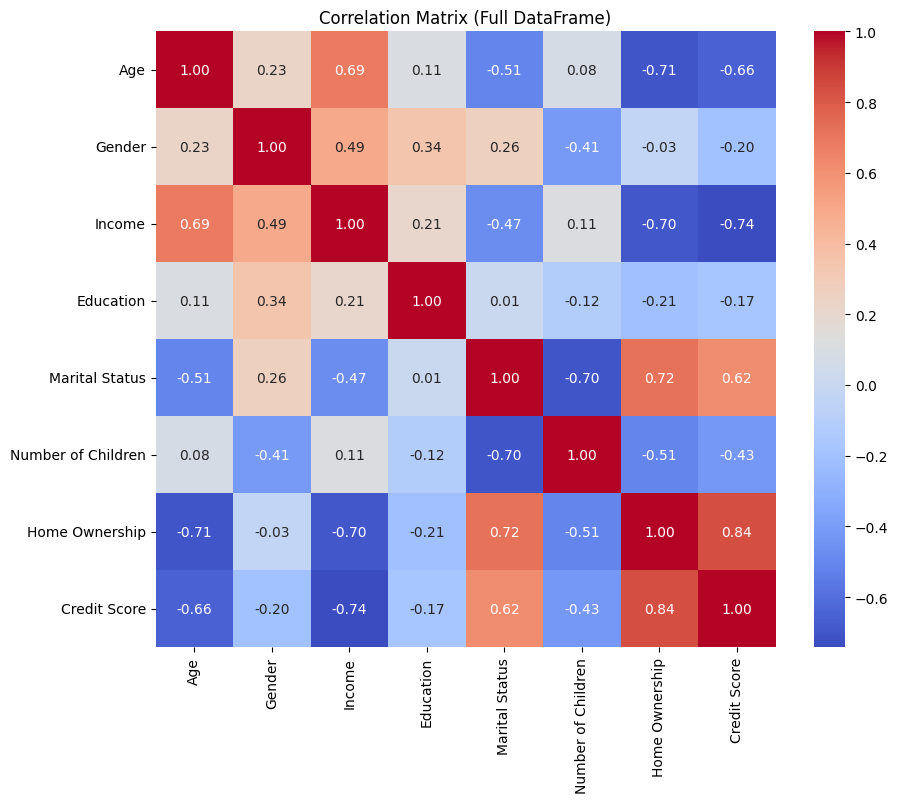

In [ ]:
# Calculando a matriz de correlação
# Usando Label Encoding para variáveis categóricas antes de calcular a correlação

df_encoded = df.copy()
label_encoders = {}
for column in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])
    label_encoders[column] = le

correlation_matrix_full = df_encoded.corr()

#Plotando a matriz de correlação usando um mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_full, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Full DataFrame)')
plt.show()

In [ ]:
# Balanceamento de Classes
from imblearn.over_sampling import SMOTE

# Separar features (X) e target (y)
X = df.drop('Credit Score', axis=1)
y = df['Credit Score']

# Converter atributos categóricos em numéricos usando Label Encoding
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Aplicar SMOTE para balancear as classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Divisão em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print("Shapes após o balanceamento e divisão:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


Shapes após o balanceamento e divisão:
X_train: (211, 7)
X_test: (53, 7)
y_train: (211,)
y_test: (53,)


In [ ]:
from imblearn.over_sampling import RandomOverSampler

X = df.drop('Credit Score', axis=1)
y = df['Credit Score']

#Convertendo recursos categóricos em numéricos usando Label Encoding
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

#Balanceado dados
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Distribução de balanceamento
print(pd.Series(y_resampled).value_counts())

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

#print("Shapes after balancing and splitting:")
#print("X_train:", X_train.shape)
#print("X_test:", X_test.shape)
#print("y_train:", y_train.shape)
#print("y_test:", y_test.shape)

Credit Score
Alto     88
Médio    88
baixo    88
Name: count, dtype: int64
